In [259]:
# packages and dependencies import
import pandas as pd # used for data manipulation
import seaborn as sns # Used for Exploratory Data Analysis
import numpy as np
import matplotlib # used for data visualization
import matplotlib.pyplot as plt

In [278]:
# Data Import
data = pd.read_csv("/home/tjselevani/PycharmProjects/PythonProject/data/last-3-months-transactions.csv")

# Convert 'created_at' column to datetime if not already
data['created_at'] = pd.to_datetime(data['created_at'])

# Extract time in minutes since start of the day
data.loc[:, 'minutes'] = data['created_at'].dt.hour * 60 + data['created_at'].dt.minute

# Extract time in hours since start of the day
data.loc[:, 'hours'] = data['created_at'].dt.hour

# Extract the day of the week (0 = Monday, 6 = Sunday)
day_data['day_of_week'] = day_data['created_at'].dt.dayofweek

# Extract the week from 'created_at'
data.loc[:, 'week'] = data['created_at'].dt.to_period('W').astype(str)

# Extract the month from 'created_at'
data.loc[:, 'month'] = data['created_at'].dt.to_period('M').astype(str)


In [261]:
def format_minutes_xticks():
    """Returns tick positions and labels for minutes of the day."""
    return range(0, 1441, 60), [f"{h}:00" for h in range(0, 25)]

def format_hours_xticks():
    """Returns tick positions and labels for hours of the day."""
    return range(0, 25, 1), [f"{h}:00" for h in range(0, 25)]

def format_days_xticks():
    """Returns tick positions and labels for days of the week."""
    days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
    return range(len(days)), days

def format_weeks_xticks(week_labels):
    """Returns tick positions and labels for weeks."""
    return range(len(week_labels)), week_labels

def format_months_xticks(month_labels):
    """Returns tick positions and labels for months."""
    return range(len(month_labels)), month_labels

def format_years_xticks(year_labels):
    """Returns tick positions and labels for years."""
    return range(len(year_labels)), year_labels

In [262]:
#data.head()

In [263]:
#data.tail()

In [264]:
#data.shape

In [265]:
#data.columns

In [266]:
#data.describe()

In [267]:
#data.isnull().sum()

In [268]:
#Data Visualization

In [283]:
# Filter data for the specific vehicle
def get_vehicle_data(vehicle_id):
    """Returns all, credit, and debit transaction data for a given vehicle."""
    vehicle_df = data[data['vehicle_booked'] == vehicle_id].copy()
    
    return {
        "all": vehicle_df,
        "credit": vehicle_df[vehicle_df['transaction_type'] == 'CREDIT'].copy(),
        "debit": vehicle_df[vehicle_df['transaction_type'] == 'DEBIT'].copy(),
    }

# Define the vehicles
vehicles = ['SM191', 'SM192', 'SM055', 'SM024']

# Create a dictionary to store data for all vehicles
vehicle_data_dict = {v: get_vehicle_data(v) for v in vehicles}

# Select a specific vehicle dynamically
selected_vehicle = 'SM024'  # Change this to switch vehicles

vehicle_data = vehicle_data_dict[selected_vehicle]['credit']
vehicle_revenue = vehicle_data_dict[selected_vehicle]['debit']
data = vehicle_data_dict[selected_vehicle]['all']


In [ ]:
# Filter transactions for a specific day
# Define the target week (starting from a given day)
specific_day = "2024-12-04"  # Example: A Wednesday
specific_date = pd.to_datetime(specific_day)

# Get the start and end of the week (Monday to Sunday)
start_of_week = specific_date - pd.DateOffset(days=specific_date.weekday())  # Get Monday of the week
end_of_week = start_of_week + pd.DateOffset(days=6)  # Get Sunday of the week


# Filter transactions for the entire week
weekly_data = vehicle_data.loc[
    (vehicle_data['created_at'].dt.date >= start_of_week.date()) &
    (vehicle_data['created_at'].dt.date <= end_of_week.date())
].copy()

In [281]:
#vehicle_data

In [272]:
day_data = vehicle_data.loc[vehicle_data['created_at'].dt.date == pd.to_datetime(specific_day).date(), :].copy()

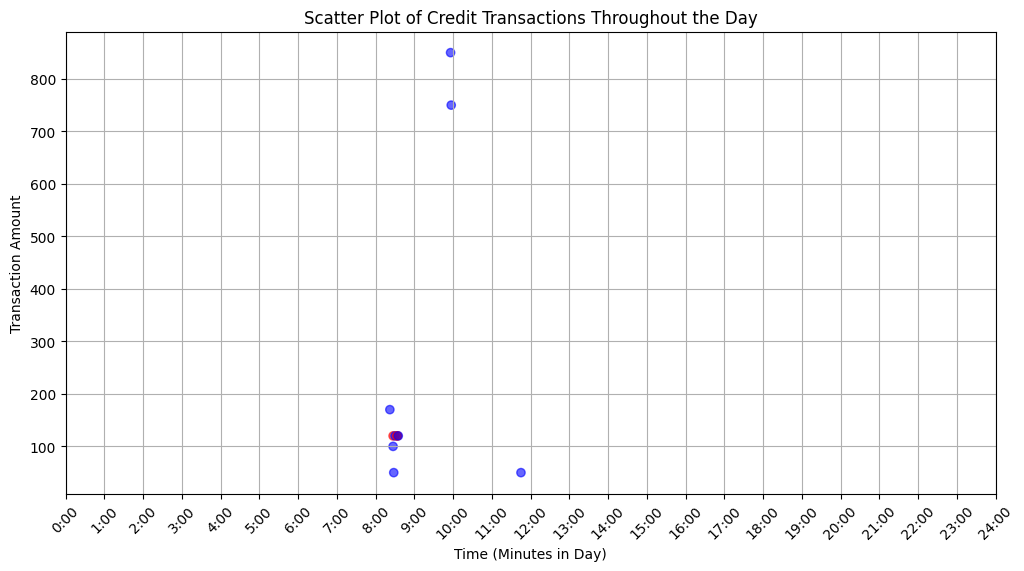

In [273]:
# Plot scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(
    day_data['minutes'], day_data['amount'],
    c=['red' if status == 3 else 'blue' for status in day_data['payment_status']], alpha=0.6
)

# Labels and formatting
plt.title("Scatter Plot of Credit Transactions Throughout the Day")

plt.xlabel("Time (Minutes in Day)")
plt.ylabel("Transaction Amount")


xticks, labels = format_minutes_xticks()
plt.xticks(xticks, labels=labels, rotation=45)

plt.grid(True)
plt.show()

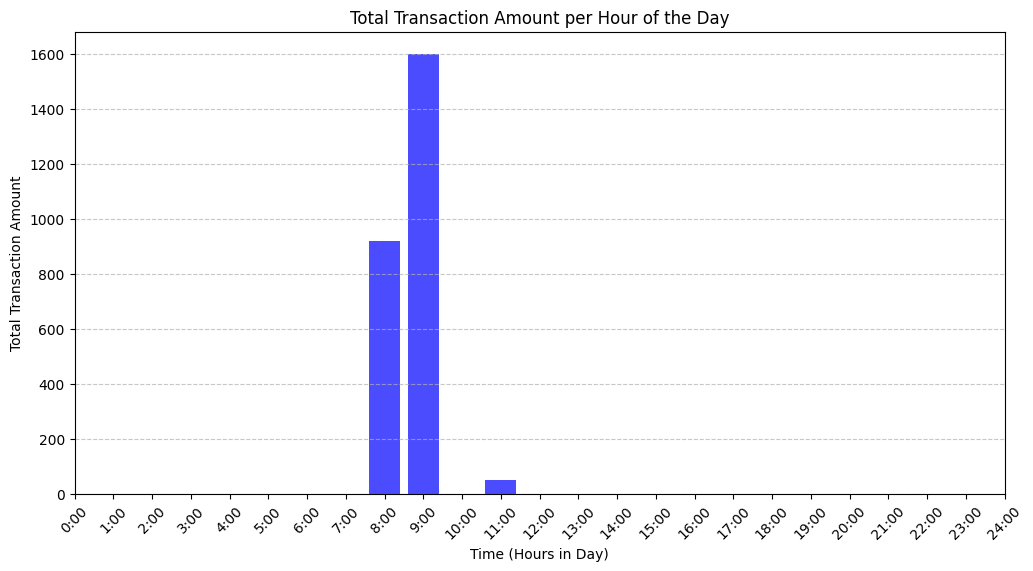

In [274]:
# Aggregate sum of amounts per hour
hourly_sums = day_data.groupby(day_data['minutes'] // 60)['amount'].sum()

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(hourly_sums.index, hourly_sums.values, color='blue', alpha=0.7)

# Labels and formatting
plt.title("Total Transaction Amount per Hour of the Day")
plt.xlabel("Time (Hours in Day)")
plt.ylabel("Total Transaction Amount")

xticks, labels = format_hours_xticks()
plt.xticks(xticks, labels=labels, rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

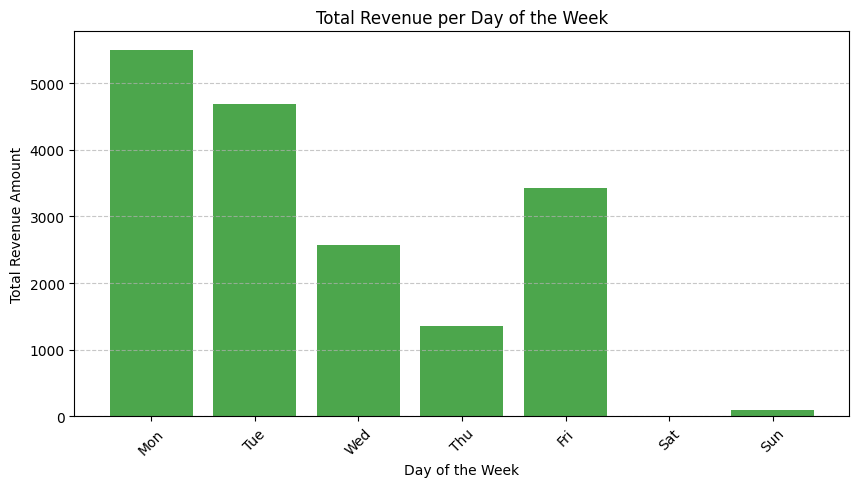

In [284]:
# Aggregate sum of revenue (assuming revenue is DEBIT transactions)
# Group data by 'day_of_week' and sum amounts
weekly_revenue = weekly_data.groupby(weekly_data['created_at'].dt.dayofweek)['amount'].sum()


# Define day labels
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(weekly_revenue.index, weekly_revenue.values, color='green', alpha=0.7)

# Labels and formatting
plt.title("Total Revenue per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Revenue Amount")

xticks, labels = format_days_xticks()
plt.xticks(xticks, labels=labels, rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#vehicle_revenue

In [ ]:
day_revenue = data.loc[data['created_at'].dt.date == pd.to_datetime(specific_day).date(), :].copy()

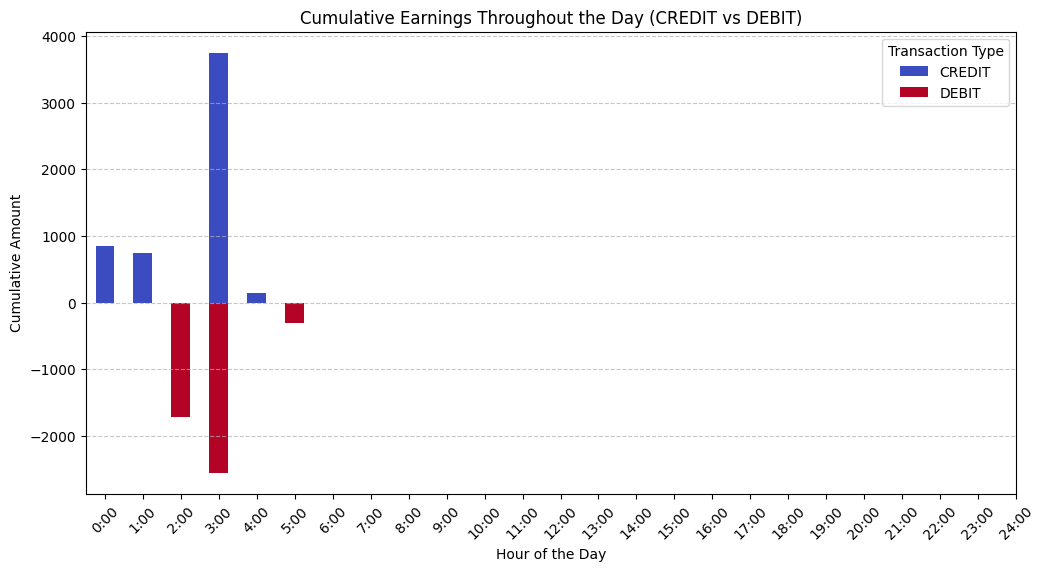

In [ ]:
# Bar graph for cumulative earnings per hour split by transaction type

cumulative_earnings = day_revenue.groupby(["hours", "transaction_type"])["amount"].sum().unstack().fillna(0)

cumulative_earnings.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.title("Cumulative Earnings Throughout the Day (CREDIT vs DEBIT)")

plt.xlabel("Hour of the Day")
plt.ylabel("Cumulative Amount")

xticks, labels = format_hours_xticks()
plt.xticks(xticks, labels=labels, rotation=45)
plt.legend(title="Transaction Type")

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:

# # create Lineplot for sum of fares
# plt.figure(figsize=(12, 6))
# sns.lineplot(x='hour', y='amount', data=hourly_fares, marker='o', label="Hourly Fare")

# plt.title(f"Fare Amount by Hour ({specific_day}) for {VEHICLE_BOOKED}")
# plt.xlabel("Hour of the Day")
# plt.ylabel("Total Fare")
# plt.xticks(range(0, 24))
# plt.grid(True)
# plt.show()

In [ ]:
# # Create the scatter plot
# plt.figure(figsize=(10, 5))
# plt.scatter(daily_data["hour"], daily_data["amount"], c="blue", alpha=0.6, label="Transaction Amounts")
# plt.xlabel("Time")
# plt.ylabel("Amount")
# plt.title("Scatter Plot of Amount vs Time")
# plt.xticks(range(0, 24))
# plt.grid(True)
# plt.legend()
# plt.show()
